## import the packages




In [3]:
# Section1 : Import libraries
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



## Loading the dataset

In [10]:
## Section 2: Loading the data
cancer =  pd.read_csv("/home/josiamosses/Cancer_detection/dataset/data.csv",index_col=False)

In [16]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis

Text(0.5, 1.0, 'Count of different values')

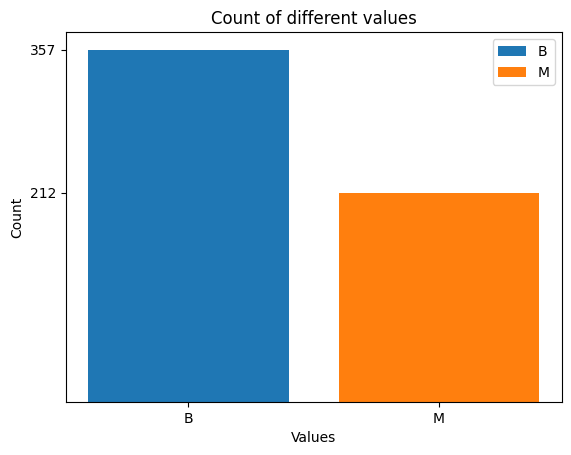

In [17]:
d = cancer["diagnosis"].value_counts()
keys = d.keys()
values = d.values
for k in keys:
    plt.bar(k,d[k], label = k)
plt.legend()
plt.xlabel('Values')
plt.ylabel('Count')
plt.xticks(keys)
plt.yticks(values)
plt.title('Count of different values')

<Axes: >

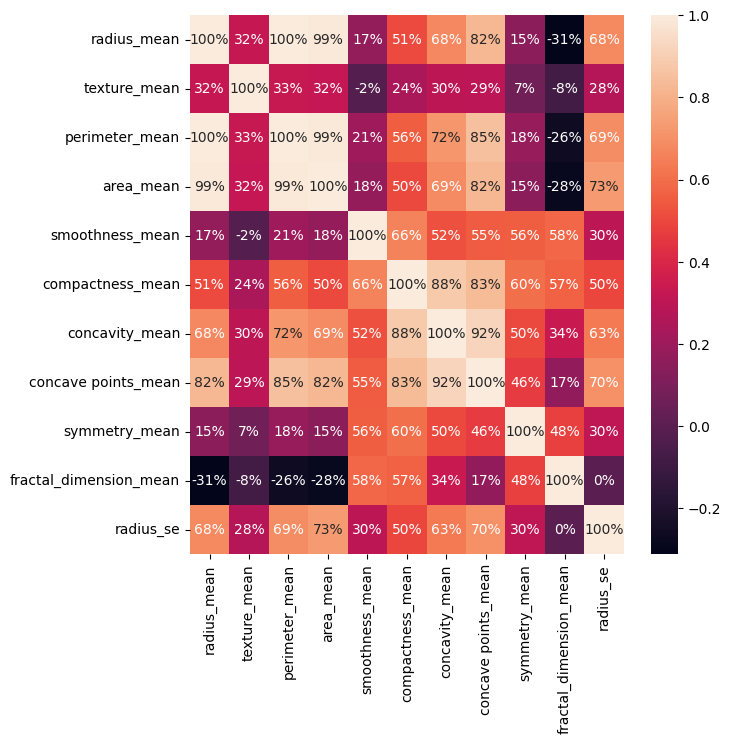

In [20]:
# Ensure only numeric columns are selected for correlation
numeric_columns = cancer.select_dtypes(include=['number']).iloc[:, 1:12]
cor = numeric_columns.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(cor, annot=True, fmt=".0%")

## preprocessing

preprocessing steps:

1. Removing the `id` column
2. Encoding the `diagnosis` column



In [31]:
# The dataset before preprocessing
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Encoding
As the diagnosis column is in string format (we need to work with numeric data) we use `LabelEncoder` to encode it to binary numbers.

In [33]:
# Encoding the 'diagnosis' column
LabelEncoder_y = LabelEncoder()
cancer['diagnosis'] = LabelEncoder_y.fit_transform(cancer['diagnosis'].values)

In [34]:
# The dataset after preprocessing
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Train & Test Split

In [47]:
# Splitting the dataset into dependent (X) and independent (Y) variables
x = cancer.loc[:, cancer.columns != 'diagnosis']
y = cancer['diagnosis'].values

In [26]:
# Conver x and y to numerical arrays
x = x.values
y = y.values

In [40]:
# Splitting the dataset into training and testing sets
x_train,x_test,y_train, y_test = train_test_split (x,y,test_size = 0.25, random_state=0)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (426, 30)
y_train shape: (426,)
x_test shape: (143, 30)
y_test shape: (143,)


### Feature Scaling

In [50]:
# data before scale
print(x_train.iloc[0])  # First row
print(x_train.iloc[:, 0])  # First column

radius_mean                 11.850000
texture_mean                17.460000
perimeter_mean              75.540000
area_mean                  432.700000
smoothness_mean              0.083720
compactness_mean             0.056420
concavity_mean               0.026880
concave points_mean          0.022800
symmetry_mean                0.187500
fractal_dimension_mean       0.057150
radius_se                    0.207000
texture_se                   1.238000
perimeter_se                 1.234000
area_se                     13.880000
smoothness_se                0.007595
compactness_se               0.015000
concavity_se                 0.014120
concave points_se            0.008578
symmetry_se                  0.017920
fractal_dimension_se         0.001784
radius_worst                13.060000
texture_worst               25.750000
perimeter_worst             84.350000
area_worst                 517.800000
smoothness_worst             0.136900
compactness_worst            0.175800
concavity_wo

In [51]:
# Perform the feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [52]:
# data after scaling
x_train[0]

array([-0.65079907, -0.43057322, -0.68024847, -0.62698309, -0.91381897,
       -0.93335153, -0.78763077, -0.67944444,  0.25404078, -0.79877182,
       -0.68958948,  0.04723809, -0.78036299, -0.55337361,  0.21546423,
       -0.59450332, -0.55964264, -0.52889336, -0.30718648, -0.73414209,
       -0.6661438 ,  0.01849243, -0.68117939, -0.63150142,  0.19196229,
       -0.50775064, -0.69592933, -0.36433881,  0.32349851, -0.7578486 ])

## Building the models

### Train the models

In [65]:
def classifier(x_train, y_train):
    # Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)

    # Decision Tree
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree.fit(x_train, y_train)

    # Random Forest
    forest = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=0)
    forest.fit(x_train, y_train)

    # Printing the accuracy of each model
    print(f"Logistic regression - train accuracy: {log.score(x_train, y_train)}")
    print(f"Decision tree - train accuracy:       {tree.score(x_train, y_train)}")
    print(f"Random forest - train accuracy:       {forest.score(x_train, y_train)}")

    output = [
           {
            'name' : 'Logistic Regression',
            'model': log
            },
           {
            'name' : 'Decision Tree',
            'model': tree
            },
           {
            'name' : 'Random Forest',
            'model': forest
            },
    ]
    return output

trained_models = classifier(x_train, y_train)



Logistic regression - train accuracy: 0.9906103286384976
Decision tree - train accuracy:       1.0
Random forest - train accuracy:       1.0


### Testing and Evaluating the models

In [66]:
for classifier in trained_models:

    print(f"Model: {classifier['name']}")
    print("Classification Report: ")
    print(classification_report(y_test, classifier['model'].predict(x_test)))
    print("Accuracy Score: ", accuracy_score(y_test, classifier['model'].predict(x_test)))
    print("******************************************************")

Model: Logistic Regression
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy Score:  0.958041958041958
******************************************************
Model: Decision Tree
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy Score:  0.958041958041958
******************************************************
Model: Random Forest
Classification Report: 
              precision  

In [69]:
import joblib
joblib.dump(trained_models[2]['model'], '/home/josiamosses/Cancer_detection/src/model.pkl')  # Save Random Forest model

['/home/josiamosses/Cancer_detection/src/model.pkl']